# Custom PCA Library ShowDown

In [1]:
root_directory = '/Users/vojtechremis/Desktop/VŠ/BP/bachelorproject_git/bachelorproject/'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from Inc import pca
from sklearn.datasets import load_iris

Duplicate key in file '/Users/vojtechremis/Desktop/bachelorproject/Inc/MatPlotLib_styles/classicChart.mplstyle', line 9 ('font.family: DejaVu Sans')


In [3]:
iris = load_iris()
X = iris.data[: ,:6]
y = iris.target

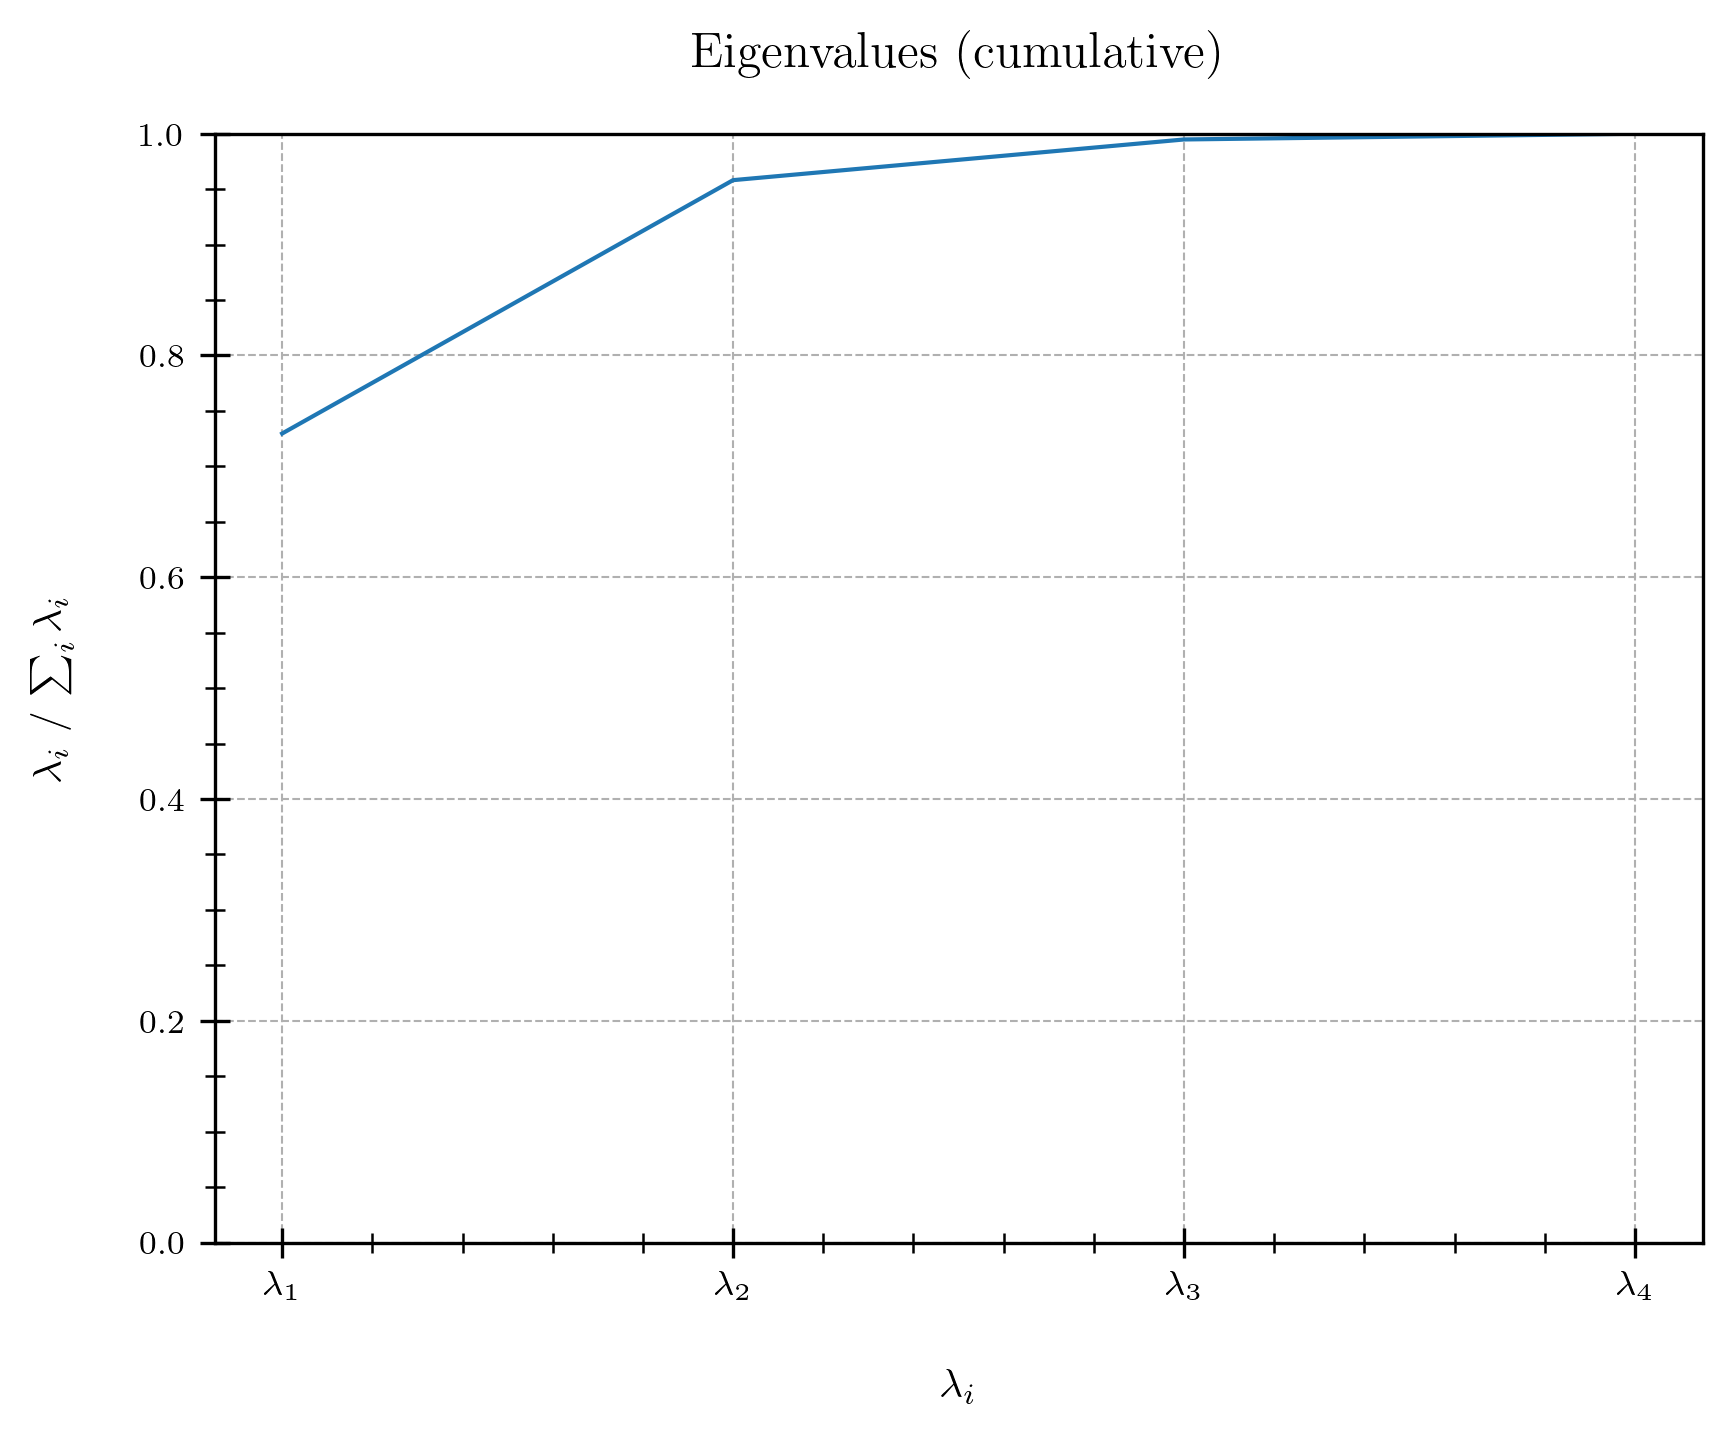

Custom eigenvectors: 
 [[ 0.39679544 -0.20511001]
 [ 0.09001139  0.22019938]]


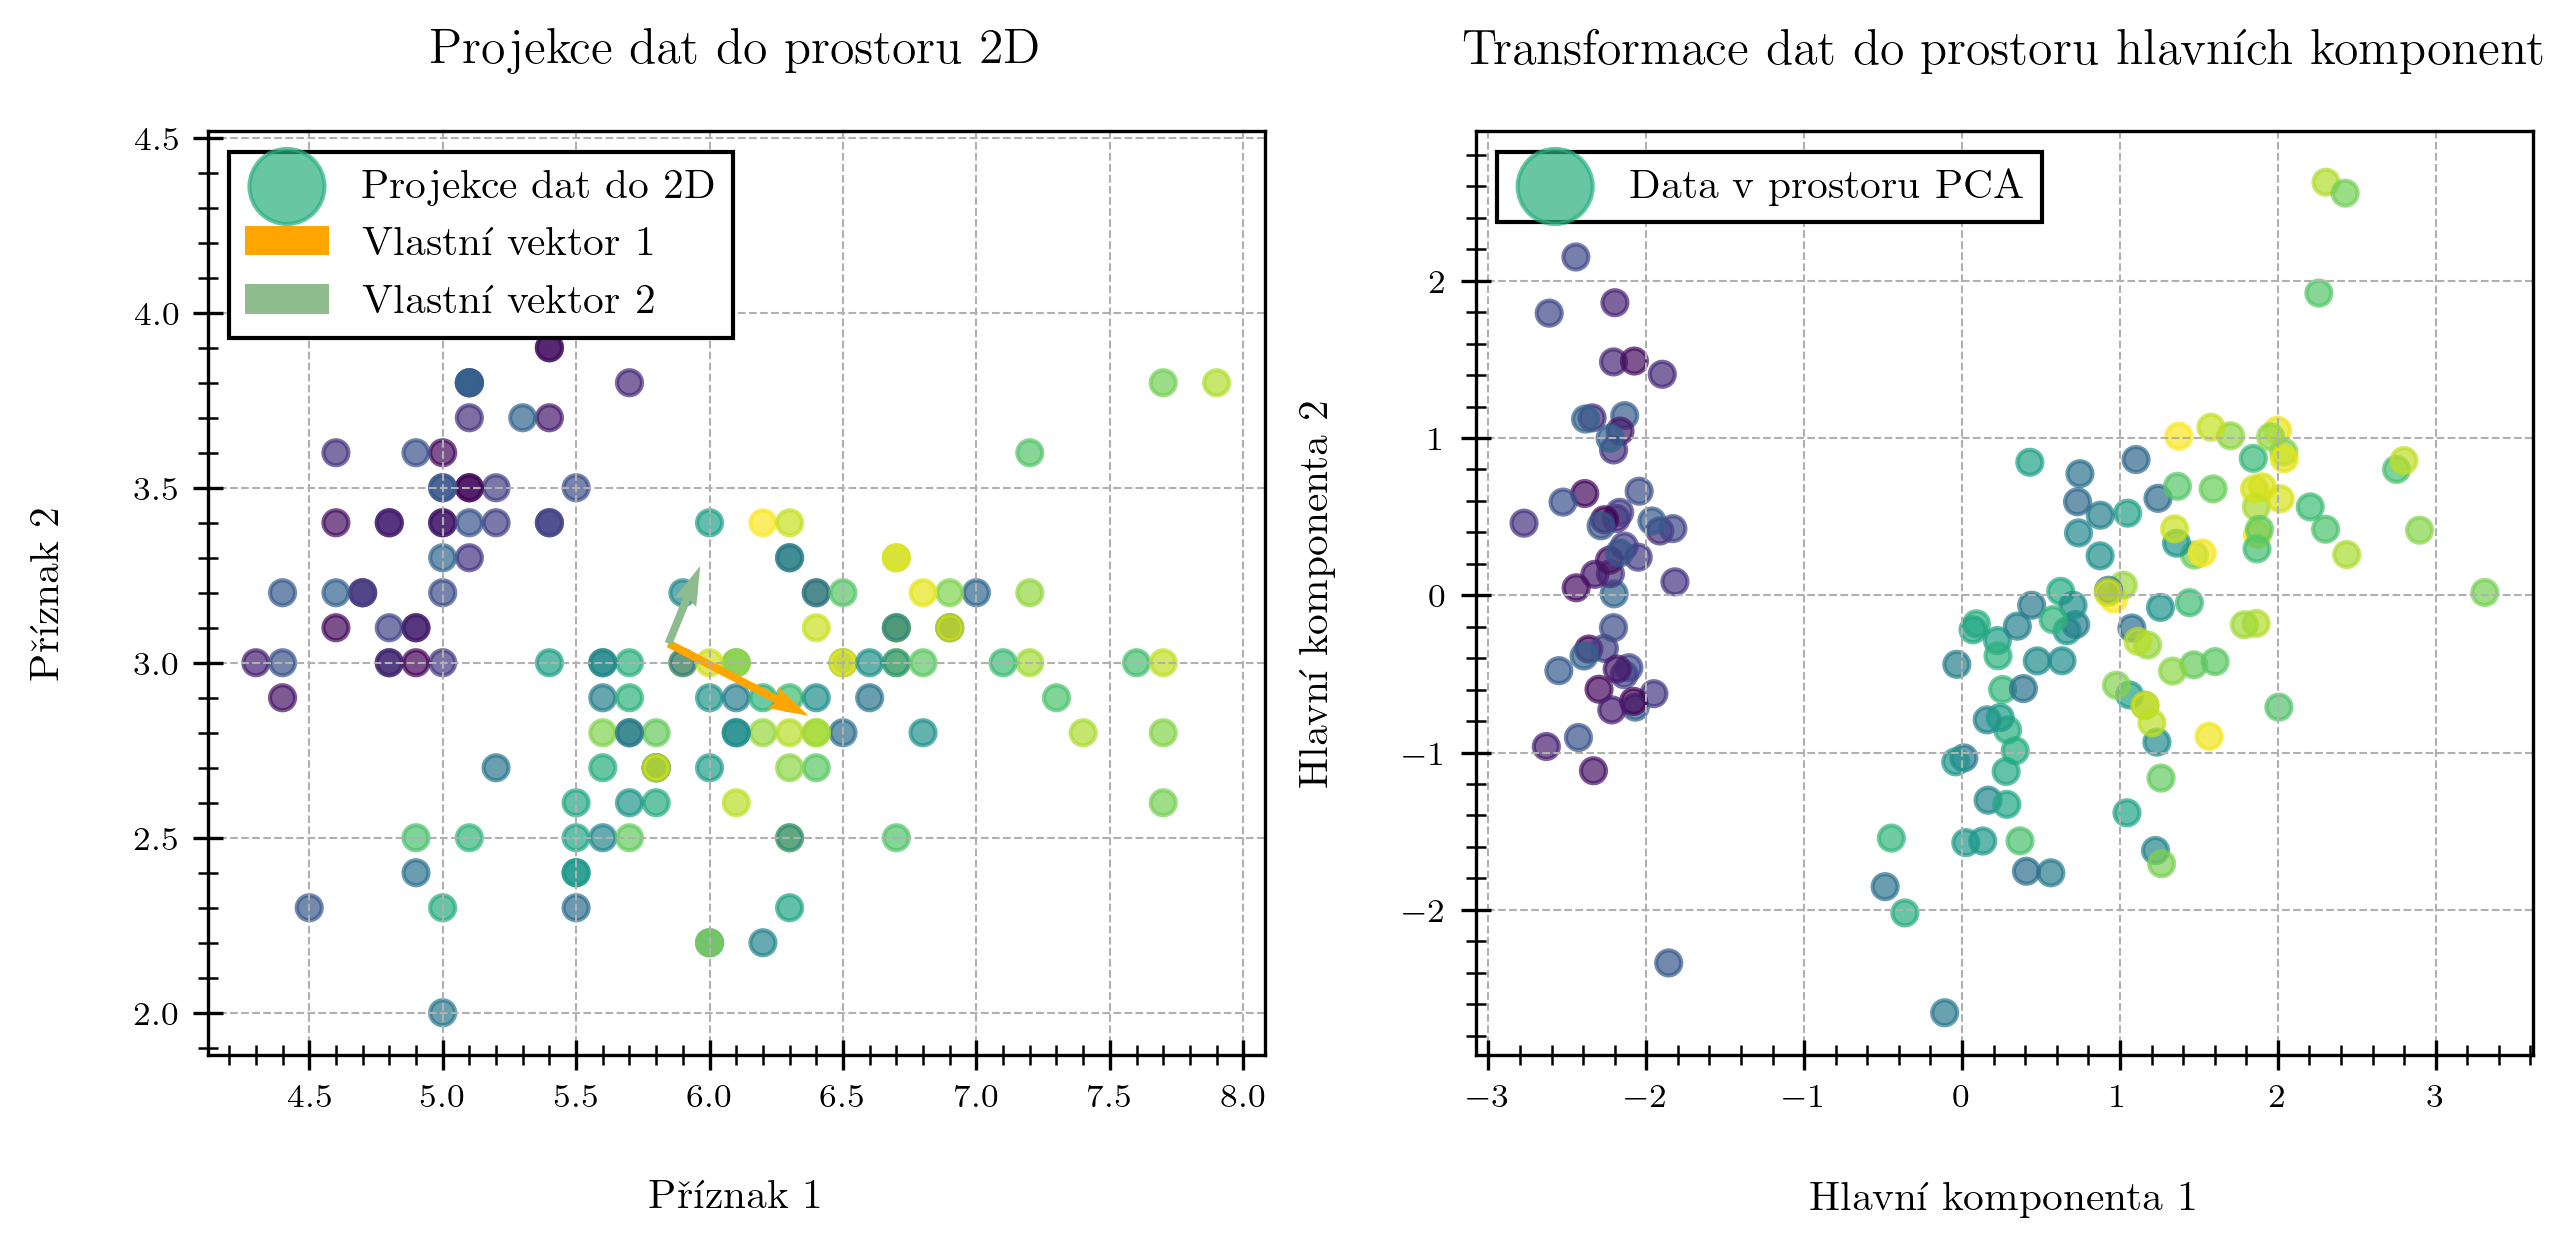

PCA basic data have been saved to '/Users/vojtechremis/Desktop/VŠ/BP/bachelorproject_git/bachelorproject/PCA_showdown/Output'.


In [4]:
N = 2

# Custom PCA Implementation
custom_pca = pca.PCA()
custom_pca.fit(X)
custom_pca.setN(N)

X_pcaSpace_custom = custom_pca.transform(X)
X_originalSpace_custom = custom_pca.inverse_transform(X_pcaSpace_custom)

eigenVectors_custom = custom_pca.getPrincipalEigenvectors(scaled=True).T
eigenVectors_custom_inv = custom_pca.inverse_transform(eigenVectors_custom[:N, :N], standardInverseTransform=False)

print('Custom eigenvectors: \n', eigenVectors_custom)





# Limit sizes to 1000 samples
random_indices = np.random.choice(len(X), 150, replace=False)
X = X[random_indices]
X_pcaSpace_custom = X_pcaSpace_custom[random_indices]
X_originalSpace_custom = X_originalSpace_custom[random_indices]
y = [random_indices]



# Plotting


# Plots for thesis
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(X[:, 0], X[:, 1], label='Projekce dat do 2D', alpha=0.7, c=y, cmap='viridis') #  color='lightseagreen'
axs[0].set_title('Projekce dat do prostoru 2D')
axs[0].set_xlabel('Příznak 1')
axs[0].set_ylabel('Příznak 2')
axs[0].grid(True)

origin = np.mean(X[:, :N], axis=0)
colors = ['orange', 'darkseagreen']
for i in range(eigenVectors_custom.shape[0]):
    axs[0].quiver(*origin, eigenVectors_custom[i, 0], eigenVectors_custom[i, 1], color=colors[i], scale=3, label=f'Vlastní vektor {i+1}', edgecolors='black')

axs[0].legend()

axs[1].scatter(X_pcaSpace_custom[:, 0], X_pcaSpace_custom[:, 1], label='Data v prostoru PCA', alpha=0.7, c=y, cmap='viridis') # color='lightseagreen'
axs[1].set_title('Transformace dat do prostoru hlavních komponent')
axs[1].set_xlabel('Hlavní komponenta 1')
axs[1].set_ylabel('Hlavní komponenta 2')
axs[1].legend()

axs[1].grid(True)
plt.show()

output_directory = root_directory+'PCA_showdown/Output'
custom_pca.save(output_directory)

# Load PCA from file and make better Explained Variance plot

Eigenvectors and eigenvalues have been loaded from '/Users/vojtechremis/Desktop/VŠ/BP/bachelorproject_git/bachelorproject/Bonus/PCA/PCA_showdown/Output'.


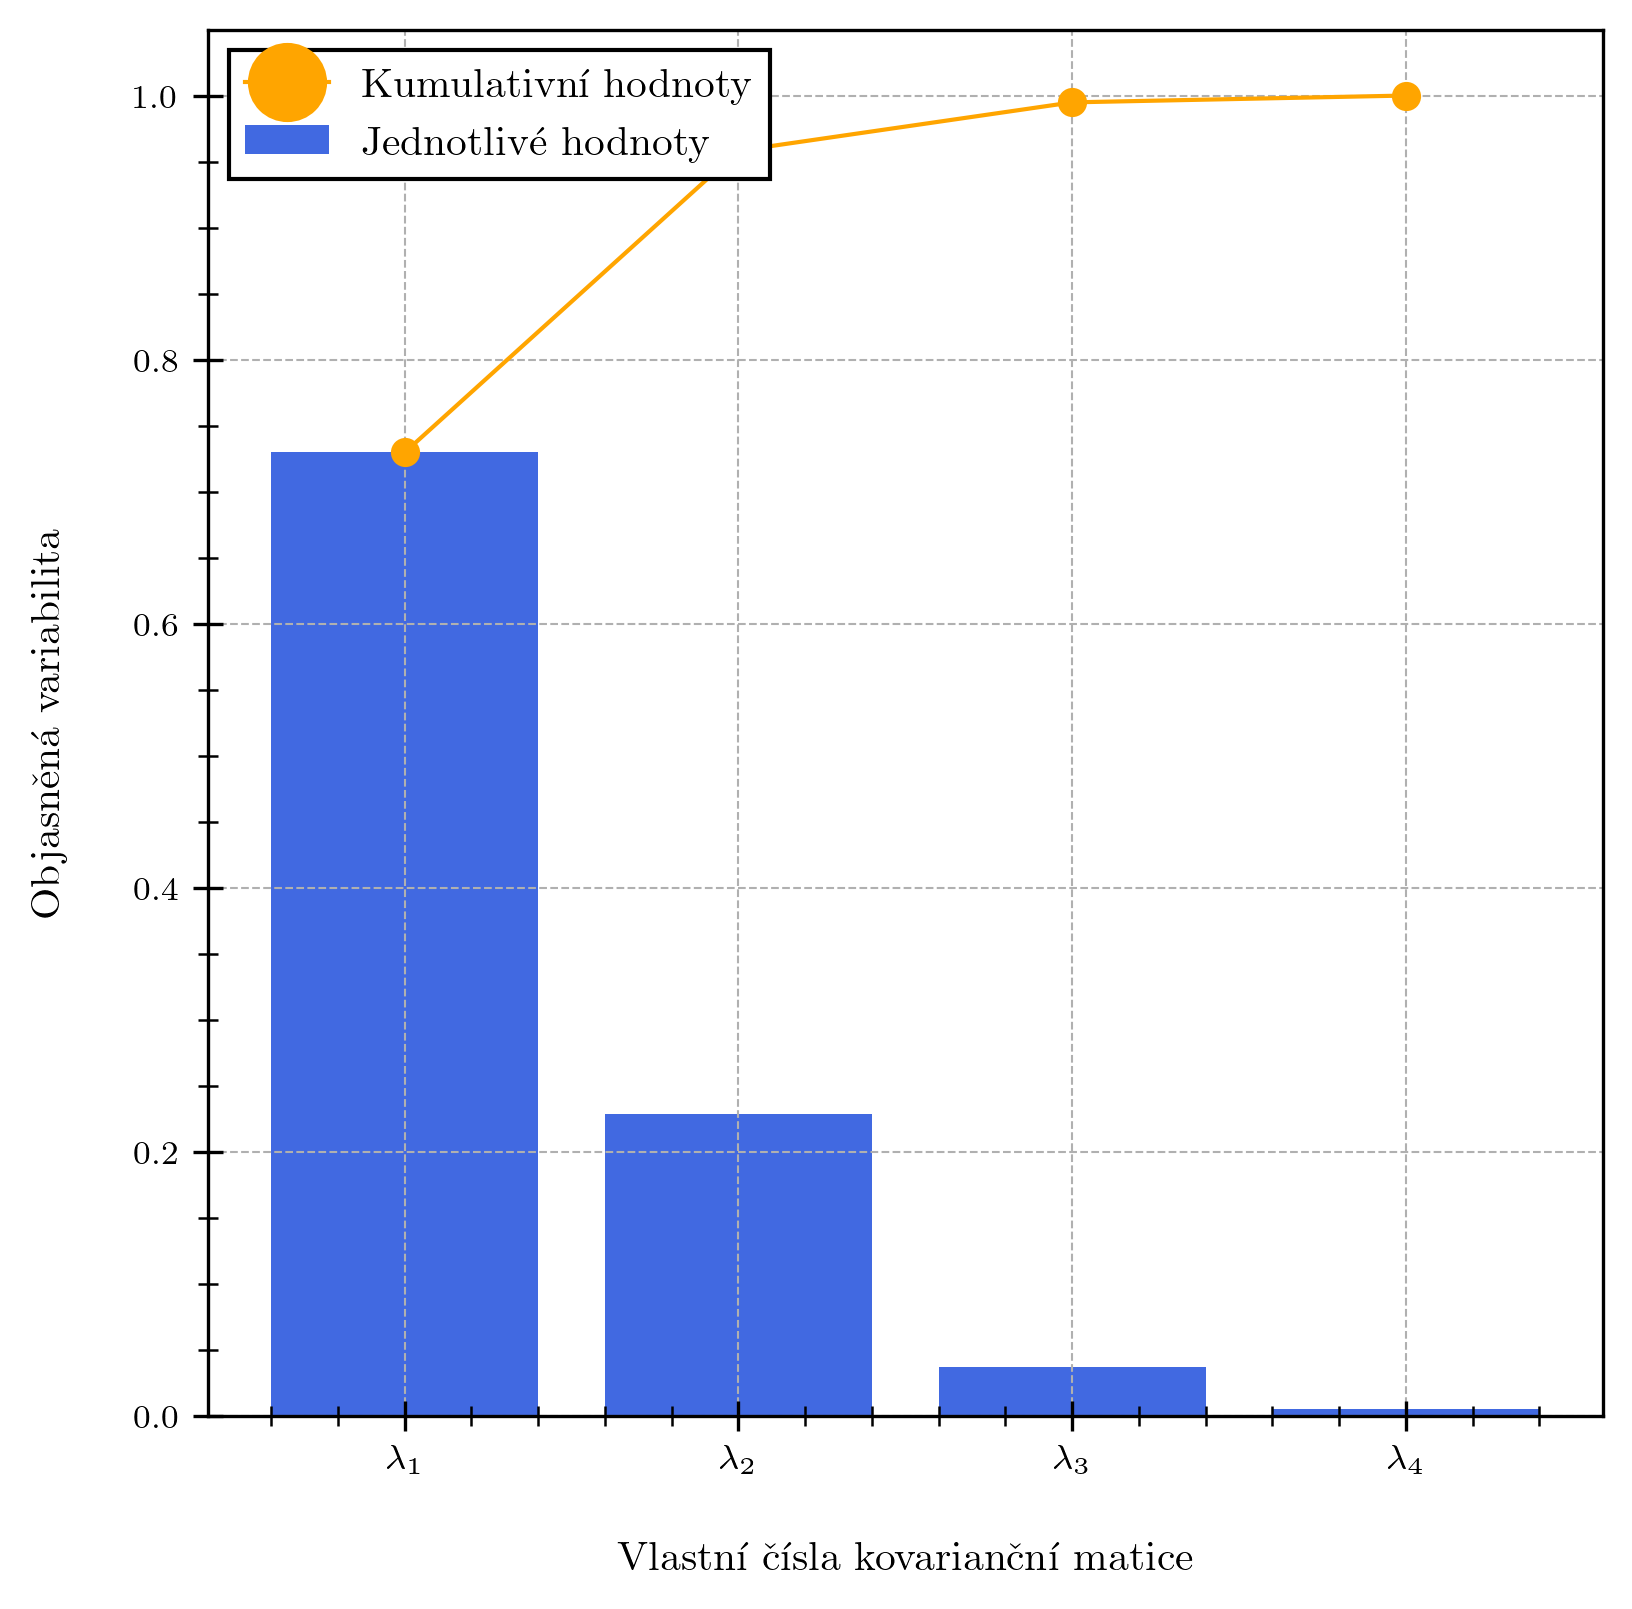

In [5]:
loadtest = pca.PCA(sourceDir=root_directory+'Bonus/PCA/PCA_showdown/Output')

# Calculating explained variance
eigenvalues = loadtest.eigenvalues

eigenvalues_ratio = eigenvalues / np.sum(eigenvalues)
eigenvalues_ratio_cumulative = np.cumsum(eigenvalues_ratio)

x_axis = ['$\lambda_'+str(i+1)+'$' for i in range(len(eigenvalues))]


fig = plt.figure(figsize=(6, 6))
plt.bar(range(len(eigenvalues)), eigenvalues_ratio, color='royalblue', alpha=1, label='Jednotlivé hodnoty', width=0.8, linewidth=2)
plt.plot(range(len(eigenvalues)), eigenvalues_ratio_cumulative, color='orange', label='Kumulativní hodnoty',  marker='o')
plt.xticks(range(len(eigenvalues)), x_axis, size='small')
plt.xlabel('Vlastní čísla kovarianční matice')
plt.ylabel('Objasněná variabilita')
plt.legend()
plt.grid(True)

plt.show()